In [31]:
import geopandas as gpd
from shapely.geometry import shape, MultiPolygon
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import contextily as ctx

##### Read GeoJSON and combine geometries to create boundary

In [ ]:
# Load GeoJSON file
geojson_path = './district.geojson'
gdf = gpd.read_file(geojson_path)

# Extract individual geometries
geometries = [shape(geometry) for geometry in gdf['geometry']]

# Create a MultiPolygon representing the union of all geometries
union_geometry = unary_union(geometries)

# Convert the union geometry to a GeoDataFrame
union_gdf = gpd.GeoDataFrame(geometry=[union_geometry])

# Save the result to a new GeoJSON file
#union_gdf.to_file('kerala_boundary.geojson', driver='GeoJSON')

 #### Plot Study Area 

/tmp/ipykernel_810/4258779203.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['DISTRICT']):


Text(206.95214319088117, 0.5, 'Latitude')

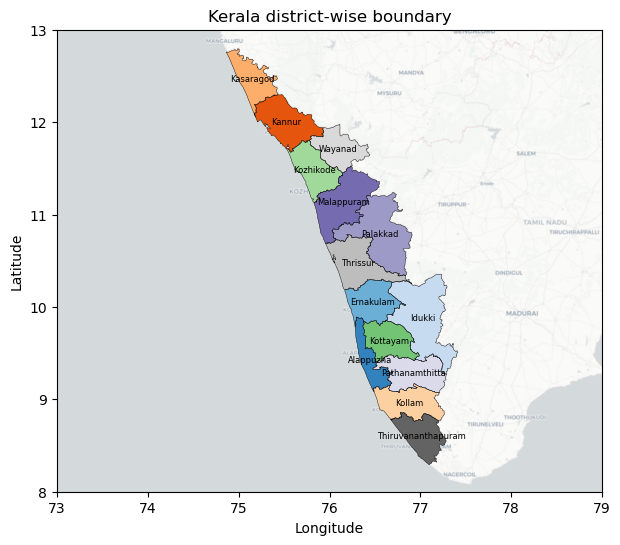

In [53]:
# Plot kerala districts
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, column='DISTRICT', cmap='tab20c')

# Add labels for each district
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['DISTRICT']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Set the xlim and ylim to cover a larger area
ax.set_xlim([73, 79])  # Adjust the longitude range
ax.set_ylim([8, 13])   # Adjust the latitude range

# Add a basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron,  alpha=1, reset_extent=True, attribution="")

# Plot the boundary
gdf.boundary.plot(ax=ax, color='black', linewidth=0.3)

plt.title('Kerala district-wise boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')